# **Çağdaş Güven 2738938**

# **ME 536**

### Hide Words In High Dimensions
### then find and count them :)

In [1]:
# only importing from following libraries are allowed. You can add more imports from them, but no new libraries here
from skimage import io
from skimage.filters import threshold_otsu as otsu
import numpy as np
from scipy.linalg import orth
from numpy.linalg import matrix_rank as rank
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sklearn
####################

from skimage.filters import threshold_otsu
from sklearn.decomposition import TruncatedSVD
from scipy.linalg import svd, qr
from numpy import linalg, random, meshgrid, mean


# also import the matrix printing function
!rm bug_numpy_utils.py 2> dump.me 
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
from bug_numpy_utils import CData as CMe
from bug_numpy_utils import GenerateDataforImage as GenImMat
from bug_numpy_utils import text2mat

--2024-12-01 17:38:43--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18456 (18K) [text/plain]
Saving to: ‘bug_numpy_utils.py’

bug_numpy_utils.py  100%[===================>]  18.02K  --.-KB/s    in 0.009s  

2024-12-01 17:38:44 (1.92 MB/s) - ‘bug_numpy_utils.py’ saved [18456/18456]



# Intro to Basics: Assignment has not started yet!
This is the warm up

## Generate and plot reference text
Generate data matrices based on two strings of same length.  
Columns of these matrices are data points, which when plotted is read as the given string.
If you prefer strings of different lengths, fill in the short string with a character.  
Using pyplot display the data points to make sure that they are readable.  


In [2]:
S1 = 'tencere'
S2 = 'pencere'
T1, T1num = text2mat(S1)
T2, T2num = text2mat(S2)

# just that we get to understand ```text2mat``` function let's print the output of the function
print(f'Shape of T1 = {T1.shape}, where letters of "{S1}" has {T1num} data points in each corresponding letter')
print(f'Shape of T2 = {T2.shape}, where letters of "{S2}" has {T2num} data points in each corresponding letter')

Shape of T1 = (3, 932), where letters of "tencere" has [121, 153, 142, 120, 153, 90, 153] data points in each corresponding letter
Shape of T2 = (3, 985), where letters of "pencere" has [174, 153, 142, 120, 153, 90, 153] data points in each corresponding letter


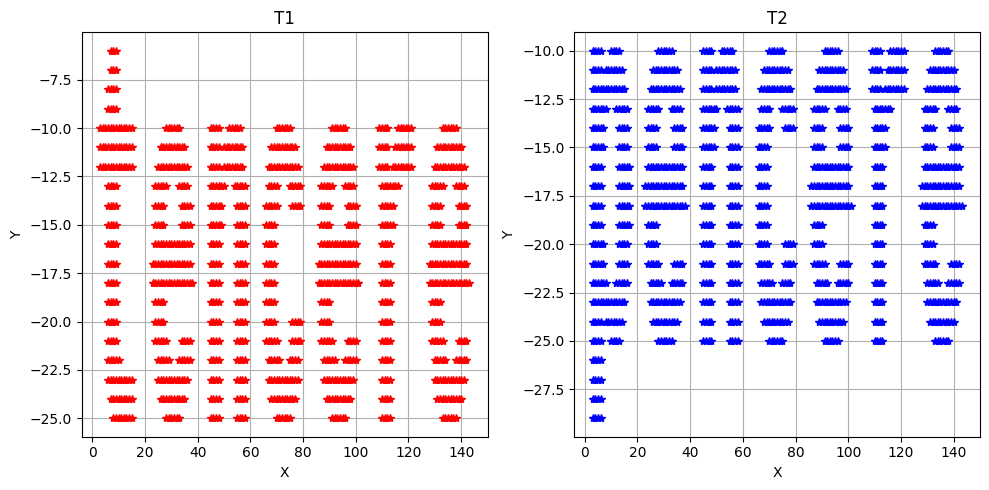

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot T1
axes[0].plot(T1[0, :], T1[1, :], '*r')
axes[0].set_title('T1')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].grid(True)

# Plot T2
axes[1].plot(T2[0, :], T2[1, :], '*b')
axes[1].set_title('T2')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### See them in 3D

In [4]:
# CELL 1
# also let's see these text in 3D
# note that text2mat actually provides data in 3D but with z=0, hence text is on XY plane
CMe(T1, f'{S1}')
CMe(T2, f'{S2}')

## Recall random uniform vs normal distribution
This implies noise will be added later in the assignment :)

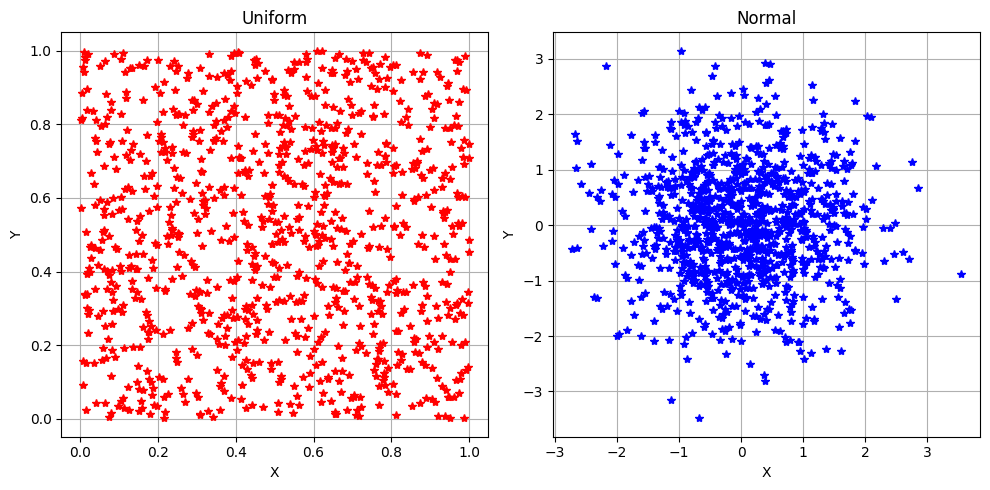

In [5]:
N1 = np.random.rand(2,1000)
N2 = np.random.randn(2,1000)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot N1
axes[0].plot(N1[0, :], N1[1, :], '*r')
axes[0].set_title('Uniform')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].grid(True)

# Plot N2
axes[1].plot(N2[0, :], N2[1, :], '*b')
axes[1].set_title('Normal')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Assignment starts here
Read the following cells carefully and respond by filling in the code and text cells. Your explanations brief yet clear.

You are to practice and hopefully get better if not excel in SVD usage at the end of this assignment.

## Let's generate some reference text as we did above.
I will change this text (i.e. ```S1,S2```) while grading, and run the following many times to see how your code works.  

You can try likewise, however, make sure that your submission does not involve any of your personal test code.  

I will refer the reference text using ```T1``` or ```T2``` in the remainder of this assignment. I might also use ```S1``` and ```T1``` interchangebly to refer to the same text content.

In [6]:
# similar to above, generate reference text
S1 = 'tencere'
S2 = 'pencere'
T1, T1num = text2mat(S1)
T2, T2num = text2mat(S2)

# let's make sure that we start with a 2D array, recall that text2mat function retuns a 3xK matrix with K data points
T1 = T1[0:2, :] # get only the XY coordinates of the data points, note that text2mat retuns 3D data points with z = 0
T2 = T2[0:2, :] # get only the XY coordinates of the data points, note that text2mat retuns 3D data points with z = 0

In [7]:
# CELL 2
Nd = 3 # dimension of the ambient space to which data will be projected
B = np.random.rand(Nd,2) # generate a random basis
ND_Data = B@T1 # convert or project 2D data points to Np Dimensions, in other words project data points onto a plane in some Np-Dimensional space
# we start with 3 dimensions so that we can view
# let's view the projected text in 3D
CMe(ND_Data)

### Explain - 1:
The first code block transforms the string texts $ S1 = \text{'tencere'} $ and $ S2 = \text{'pencere'} $ into 2D datasets $ T1 $ and $ T2 $ in space using the `text2mat` function. This function maps each character of the text into spatial coordinates, resulting in a $ 3 \times K $ matrix where $ K $ is the number of points representing the text. Since the $ z $-coordinate is always $ 0 $, the data is reduced to 2D by extracting only the $ x $- and $ y $-coordinates ($ T1 = T1[0:2, :] $, $ T2 = T2[0:2, :] $).

In the second block, the transformation applies a linear mapping to change the text's orientation and shape. The mapping typically involves a rotation matrix $ R $, a stretching matrix $ S $, and a translation vector 
$ \mathbf{t} $:
$$
T' = R \cdot S \cdot T + \mathbf{t},
$$
where $ T $ is the original dataset, $ R $ rotates the text, $ S $ scales or stretches it (introducing the italic effect), and $ \mathbf{t} $ translates it to a random plane. This process modifies the position, orientation, and aspect ratio of the text data points, making them appear italicized and randomly placed.

### Fix the code in 'CELL 2' so that
It does look in the same shape despite it is always projected randomly to some plane in 3D.  

Note that if 3 is change with N, your code should also work for N-D.  

In [8]:
# when this cell is run, similar to 'CELL 2', text in T1 will be project onto a plane in Nd-Dimensions
# in order so that we can generate high dimensional data later in the assignment
# you are to fill in the following function

# we are implementing this following function

def DataInND(M, Nd = 3, NoiseLevel = 0.0, NoiseType = 'Normal'):
    '''
    M is a 2xK matrix, indicating that there are K data points in 2D
    Nd is the dimension to which data in M will be projected onto a random plane, Nd defaults to 3
    After projection Res is a NdxK matrix, it should be rank-2 at this point
    If NoiseLevel is not zero:
        a random matrix that is also NdxK and this matrix is added to the Res
        after being multiplied by NoiseLevel
    Random matrix is generated using randn() if NoiseType is 'Normal' else rand()

    Finally Res is returned
    '''
    # Generate a random projection matrix of size Nd x 2
    B = np.random.rand(Nd, 2)

    # Project the 2D data (M) into Nd-dimensional space
    Res = B @ M

    # Add noise if specified

    if NoiseLevel > 0:
        if NoiseType == 'Normal':
            noise = np.random.randn(*Res.shape) # Normal distribution
        elif NoiseType == 'Uniform':
            noise = np.random.rand(*Res.shape) # Uniform distribution
        else:
            print("Invalid NoiseType. Use 'Normal' or 'Uniform'. Defaulting to 'Normal'.")
            noise = np.random.randn(*Res.shape)
        Res += NoiseLevel * noise



    return Res

# do not change the following
# if your function works, following should work
ND_Data = DataInND(T1)

# at the end the following display the data in
if Nd == 3: # let's plot if it is viewable
    CMe(ND_Data)

## Let's move on to higher dimensions

Now, let's step by step move on to higher dimensions.  
First we will look at the no noise case and increase intensity

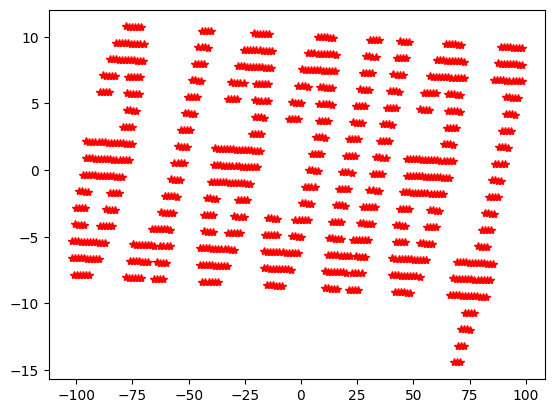

In [9]:
# using your function let's create data in Nd
ND_Data = DataInND(T1, Nd = 10) # note that no noise is added

# Your code starts here
# starting with ND_Data your code should project the text in T1 to a plane
ND_Data_func = ND_Data
# Center the data to remove translation effects
ND_Data_centered = ND_Data - np.mean(ND_Data, axis=1, keepdims=True)

# Perform SVD on the centered data
U, S, Vt = np.linalg.svd(ND_Data_centered, full_matrices=False)

# Project T1 into the same 10D space as ND_Data
T1_projected_centered = ND_Data_func - np.mean(ND_Data_func, axis=1, keepdims=True)

# Define the expected plane normal using the projected T1 in 10D
expected_normal = np.mean(T1_projected_centered, axis=1)  # Approximation of the data orientation
expected_normal = expected_normal / np.linalg.norm(expected_normal)  # Normalize

# Align the first singular vector (u1) with the expected normal
if np.dot(U[:, 0], expected_normal) < 0:  # Check alignment
    U[:, 0] = -U[:, 0]  # Flip u1 to align with the expected normal

# Align the second singular vector (u2) consistently
if np.dot(U[:, 1], expected_normal) < 0:  # Check alignment
    U[:, 1] = -U[:, 1]  # Flip u2 to maintain orientation

# Project ND_Data onto the plane spanned by u1, u2
Projected_Data = U[:, :2].T @ ND_Data_centered  # Use the centered data for projection

# Extract the X, Y coordinates
X, Y = Projected_Data[0, :], Projected_Data[1, :]

# Your code ends here and X and Y cooridantes of the

# Plot the result
plt.plot(X,Y, 'r*')

### and there comes the noise

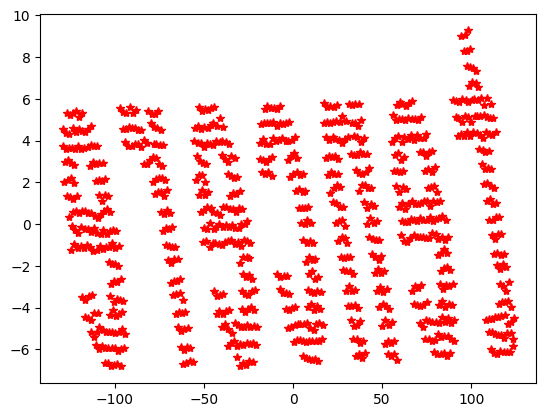

In [10]:
# using your function let's create data in Nd but this time noise will be added
# try differen values of noise, decrease, increase, run this cell many times
# get a good understanding of what happens then answer the questions below
ND_Data = DataInND(T1, Nd = 10, NoiseLevel=0.1) # note that no noise is added

# Your code starts here
# Despite the contamination in ND_Data
# your code should project the text in T1 to a plane
# and extract the X, Y coordinates

# Center the data to remove translation effects
ND_Data_centered = ND_Data - np.mean(ND_Data, axis=1, keepdims=True)

# Perform SVD on the noisy data
U, S, Vt = np.linalg.svd(ND_Data_centered, full_matrices=False)

# Retain only the top k singular values for denoising
k = 3  # Select the number of components to keep based on the scree plot
S_truncated = np.zeros_like(S)
S_truncated[:k] = S[:k]  # Retain top k singular values

# Reconstruct the denoised data
Sigma_truncated = np.diag(S_truncated)
ND_Data_denoised = U @ Sigma_truncated @ Vt

# Project the denoised data onto the plane spanned by the first two singular vectors
Projected_Data = U[:, :2].T @ ND_Data_denoised

# Extract the X and Y coordinates
X, Y = Projected_Data[0, :], Projected_Data[1, :]


# Your code ends here and X and Y cooridantes of the

# Plot the result in 2D
plt.plot(X,Y, 'r*')



### Explain - 2:
Both clear and noisy data are processed similarly by using the **first two left singular vectors** ($ \mathbf{u}_1, \mathbf{u}_2 $) obtained via SVD for projection onto a 2D plane. However, for noisy data, additional **denoising** is achieved by retaining only the top $ k $ singular values in $ \Sigma $, effectively filtering out noise that contributes to smaller singular values. This reconstruction can be expressed as:

$$
\tilde{\mathbf{M}} = \mathbf{U}_{:, :k} \cdot \mathbf{\Sigma}_{k} \cdot \mathbf{V}_{:k, :}^T,
$$

where $ k $ controls the number of dominant components retained. The primary difference between the clear and noisy cases lies in this truncation step: for noisy data, the smaller singular values (dominated by noise) are set to zero, reducing noise while preserving the data's dominant structure. 

The resulting 2D projections may appear visually similar but differ slightly due to residual noise in the noisy case. SVD effectively separates the signal (aligned with $ \mathbf{u}_1, \mathbf{u}_2 $) from the noise, ensuring that the noisy data's projection emphasizes the core structure while suppressing the random variations introduced by noise.


## Let's fancy
Now write another function

In [11]:

def TwoOrthStrInND(T1, T2, Nd = 10, NoiseLevel = 0.0, NoiseType = 'Uniform'):
    '''
    Accepts 2 data matrices of shape 2xK, preferably that comes from readable strings
    Let T1, T2 be two matrices of shape 2xK
    This function should project T1 and T2 to seperate and orthogonal planes in Nd-Dimensions
    and return Res.
    If we project points in Res on to the plane that is spanned by
    the first 2 left-singular vectors T1 should be readable on the plot
    Similarly, if we project points in the result on to the plane that is spanned by
    the following 2 left-singular vectors (i.e. the third and the fourth) T2 should be readable on the plot

    NoiseLevel and NoiseType is just like before, i.e.:
    Noise level generates a random matrix that is also NdxK and this matrix is added to the result
    after being multiplied by NoiseLevel
    Random matrix is generated using randn() if NoiseType is 'Normal' else rand()
    '''
    # Ensure Nd is sufficient for orthogonal planes

    if Nd < 4:
        print("Warning: Nd adjusted to 4 to ensure orthogonal planes.")
        Nd = 4
    # Generate random orthogonal planes

    B1 = np.random.rand(Nd, 2) # Projection matrix for T1
    B2 = np.random.rand(Nd, 2) # Projection matrix for T2

    # Ensure orthogonality between the two planes
    Q1, _ = np.linalg.qr(B1) # Orthogonalize B1
    Q2, _ = np.linalg.qr(B2 - Q1 @ (Q1.T @ B2)) # Orthogonalize B2 against Q1

    P1 = Q1[:, :2] # First two columns define the plane for T1
    P2 = Q2[:, :2] # First two columns define the plane for T2

    T1_projected = P1 @ T1 # Project T1 onto the plane
    T2_projected = P2 @ T2 # Project T2 onto the orthogonal plane

    # Combine the projected matrices
    Res = np.hstack([T1_projected, T2_projected])

    # Add noise if specified
    if NoiseLevel > 0:
        if NoiseType == 'Normal':
            noise = np.random.randn(*Res.shape) # Gaussian noise
        elif NoiseType == 'Uniform':
            noise = np.random.rand(*Res.shape) # Uniform noise
        else:
            print("Invalid noise type. Use 'Normal' or 'Uniform'. Default is 'Normal'.")
            noise = np.random.randn(*Res.shape)
        Res += NoiseLevel * noise



    return Res


### Let's try

Let's recall that SVD of matrix $\mathbf{M}$ is:

$\mathbf{M} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$.

here let $u_1$ be the first column of $\mathbf{U}$, and in general $\mathbf{u}_i$ is the $i^{th}$ column of $\mathbf{U}$, or in other words $\mathbf{u}_i$ is the $i^{th}$ left-singular vector of $\mathbf{M}$.

If we project the outcome of ```TwoOrthStrInNd``` to the plane that is spanned by $\mathbf{u}_1, \mathbf{u}_2$, and plotted in 2D the text in ```T1``` should be readable. ```T2``` should not be visible even as a line. A point at the origin is of course acceptalbe.

Similarly, if we project the outcome of ```TwoOrthStrInNd``` to the plane that is spanned by $\mathbf{u}_3, \mathbf{u}_4$, and plotted in 2D the text in ```T2``` should be readable. Evidently, ```T1``` should not be visible, other than a point at the origin.

In [12]:
# CELL 3
# get the data in Nd
Nd_Data = TwoOrthStrInND(T1, T2, Nd = 10, NoiseLevel=0.5)

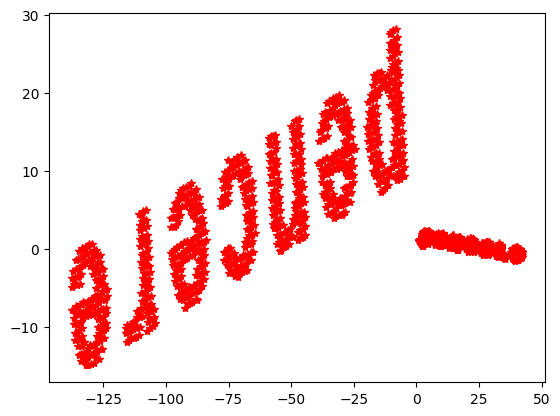

In [13]:
# Your code starts here
# project all data point in Nd_Data to the plane spanned by u1,u2 first and then plot in 2D
# let the coordinates of Nd_Data on this plane be X1, Y1
U,S, Vt = np.linalg.svd(Nd_Data, full_matrices=False)

# Denoising: Retain only the top k singular values for reconstruction
k = 4  # Adjust based on noise level and desired approximation (lower than 4 breaks second plot) 
S_truncated = np.zeros_like(S)
S_truncated[:k] = S[:k]  # Retain the top k singular values
Sigma_truncated = np.diag(S_truncated)
ND_Data_denoised = U @ Sigma_truncated @ Vt

# Projection onto the plane spanned by u1, u3 (Plane 1)
Plane_1_basis = U[:, [0, 2]]  # Select u1 and u3
Projected_T1 = Plane_1_basis.T @ ND_Data_denoised  # Use the denoised data
X1, Y1 = Projected_T1[0, :], Projected_T1[1, :]  # Extract coordinates for plotting


# Your code ends here

# let's plot and see
plt.plot(X1, Y1, 'r*')

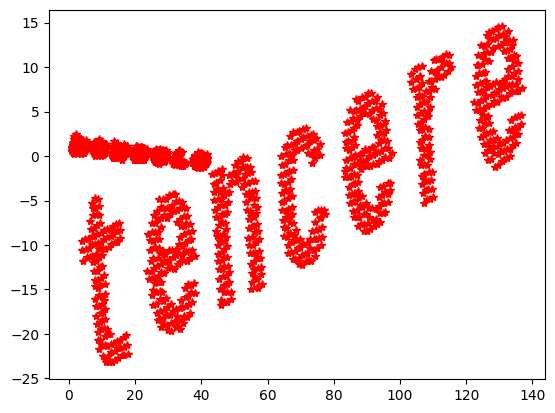

In [14]:
# Your code starts here
# proejct all data point in Nd_Data to the plane spanned by u3,u4 first and then plot
# let the coordinates of Nd_Data on this plane be X1, Y1

# Projection onto the plane spanned by u2, u4 (Plane 2)
Plane_2_basis = U[:, [1, 3]]  # Select u2 and u4
Projected_T2 = Plane_2_basis.T @ ND_Data_denoised  # Use the denoised data
X2, Y2 = Projected_T2[0, :], Projected_T2[1, :]  # Extract coordinates for plotting


# Your code ends here

# let's plot and see
plt.plot(X2, Y2, 'r*')

### Explain - 3:
The separation of $ \mathbf{u}_1, \mathbf{u}_3 $ for the first plane and $ \mathbf{u}_2, \mathbf{u}_4 $ for the second plane works because these singular vectors capture orthogonal subspaces associated with the distinct structures of $ T1 $ and $ T2 $ in $ ND\_Data $. In contrast, attempting to use $ \mathbf{u}_1, \mathbf{u}_2 $ for one plane and $ \mathbf{u}_3, \mathbf{u}_4 $ for another fails because $ \mathbf{u}_1, \mathbf{u}_2 $ may both contain significant contributions from $ T1 $, while $ \mathbf{u}_3, \mathbf{u}_4 $ may both represent $ T2 $, causing overlap in the planes and making the separation indistinct.

SVD decomposes the data matrix $ \mathbf{M} $ as $ \mathbf{M} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T $, where the left singular vectors $ \mathbf{u}_i $ span orthogonal subspaces in $ ND\_Data $. Using $ \mathbf{u}_1, \mathbf{u}_3 $ and $ \mathbf{u}_2, \mathbf{u}_4 $ ensures that the projections highlight distinct features of $ T1 $ and $ T2 $, as these singular vectors are aligned with independent aspects of the data.

As noise increases, the contributions of $ \mathbf{u}_3, \mathbf{u}_4 $ may start to overlap with the noise-influenced subspaces of $ T1 $ and $ T2 $. This contamination results in an impure projection, where $ T1 $ appears as a linear cloud in the plot for $ \mathbf{u}_2, \mathbf{u}_4 $ and $ T2 $ appears similarly in $ \mathbf{u}_1, \mathbf{u}_3 $. The noise essentially disrupts the clean orthogonality of the singular vectors, leading to mixing of features between the two projections.

## Even fancier: Consider this as bonus


In [ ]:

def TwoFacesOfAPrism(T1, T2, Nd = 10, NoiseLevel = 0.0, NoiseType = 'Uniform'):
    '''
    Similar to TwoOrthStrInND,
    Accepts 2 data matrices of shape 2xK, preferably that comes from readable strints
    Let T1, T2 be two matrices of shape 2xK
    This function should project T1 and T2 to seperate and orthogonal planes in Nd-Dimensions
    and return the resulting matrix: Res
    However, this time it is a bit different:
    If we reconstruct a rank-3 approximation of the result and use the coordiates of points in Res
    with respoect to the first 3 columns of the U matrix that is in rank-3 approximation
    this will result in a 3xK matrix and ploting this matrix using CMe() function,
    T1 and T2 should be on orthgonal planes
    i.e. if we rotate the plot so that T1 is readable, T2 should not be visible
    When this scene is propelry rotated by 90 degrees, T2 should be readable but not T1

    NoiseLevel and NoiseType is just like before, i.e.:
    Noise level generates a random matrix that is also NdxK and this matrix is added to the result
    after being multiplied by NoiseLevel
    Random matrix is generated using randn() if NoiseType is 'Normal' else rand()

    returns Res, i.e. a matrix of shape NdxK
    '''
    # Ensure T1num and T2num have the same length (equal number of letters)
    if len(T1num) != len(T2num):
        print("T1 and T2 must have the same number of letters. Results may be incorrect.")

    # Ensure Nd is sufficient for orthogonal planes
    if Nd < 4:
        print("Warning: Nd adjusted to 4 to ensure orthogonal planes.")
        Nd = 4

    # Generate random orthogonal planes
    B1 = np.random.rand(Nd, 2)  # Projection matrix for T1
    B2 = np.random.rand(Nd, 2)  # Projection matrix for T2

    # Ensure orthogonality between the two planes
    Q1, _ = np.linalg.qr(B1)  # Orthogonalize B1
    Q2, _ = np.linalg.qr(B2 - Q1 @ (Q1.T @ B2))  # Orthogonalize B2 against Q1

    P1 = Q1[:, :2]  # First two columns define the plane for T1
    P2 = Q2[:, :2]  # First two columns define the plane for T2

    # Project T1 and T2 onto their respective planes
    T1_projected = P1 @ T1
    T2_projected = P2 @ T2

    # Align letters
    X, Y, Z = [], [], []
    T1_start, T2_start = 0, 0  # Start indices for letters in T1 and T2
    for n1, n2 in zip(T1num, T2num):
        # Get letter data for T1 and T2
        T1_letter = T1_projected[:, T1_start:T1_start + n1]
        T2_letter = T2_projected[:, T2_start:T2_start + n2]

        # Match data points by interpolation
        if n1 > n2:
            indices = np.linspace(0, n2 - 1, n1).astype(int)
            T2_letter = T2_letter[:, indices]
        elif n2 > n1:
            indices = np.linspace(0, n1 - 1, n2).astype(int)
            T1_letter = T1_letter[:, indices]

        # Append aligned data
        X.extend(T1_letter[0, :])
        Y.extend(T1_letter[1, :])
        Z.extend(T2_letter[1, :])  # Use Z from T2

        # Update start indices
        T1_start += n1
        T2_start += n2

    # Combine the data
    Res = np.vstack([X, Y, Z])

    # Add noise if specified
    if NoiseLevel > 0:
        if NoiseType == 'Normal':
            noise = np.random.randn(*Res.shape)  # Gaussian noise
        elif NoiseType == 'Uniform':
            noise = np.random.rand(*Res.shape)  # Uniform noise
        else:
            print("Invalid noise type. Use 'Normal' or 'Uniform'. Defaulting to Gaussian noise.")
            noise = np.random.randn(*Res.shape)  # Default to Gaussian noise
        Res += NoiseLevel * noise

    return Res

### Let's try


In this case lets assume that $\tilde{\mathbf{M}}_3$ is the rank-3 approximation of $\mathbf{M}$.

Given that: $\mathbf{M} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$, then

$\tilde{\mathbf{M}}_3 = \begin{bmatrix} \mathbf{u}_1 & \mathbf{u}_2 & \mathbf{u}_3  \end{bmatrix}  \begin{bmatrix} \sigma_1 & 0 & 0 \\ 0 & \sigma_2 & 0 \\ 0 & 0 & \sigma_3 \end{bmatrix} \begin{bmatrix} \mathbf{v}_1^T \\ \mathbf{v}_2^T \\ \mathbf{v}_3^T   \end{bmatrix}$ = $\begin{bmatrix} \mathbf{u}_1 & \mathbf{u}_2 & \mathbf{u}_3  \end{bmatrix} \mathbf{C} $

Recall that $\mathbf{u}_i, \mathbf{v}_j$ are column vectors and columns of $\mathbf{C}$ contains the coordinates of points in $\mathbf{M}$ when they are projected down to $3D$.  

Therefore, finding $\mathbf{C}$ and plotting as follows:  
```CMe(C)```  
should provide the plot.  
When you rotate this plot so that ```S1``` is readable, ```S2``` should not be visible, and when you rotate the view properly for $90$$ degress, ```S2``` should be readable, but not ```S1```. This is as if you are vertically looking onto two neigbouring faces of a rectangular prism, and seeing different strings on each face.  

Check out the demo cell below. If you look at XY plane vertically, you should read ```FACE```, if you rotate it 90 degrees and look at XZ plane, you see just some random points. If you implement this part properly, on XY plane you should read ```S1``` and on XZ plane ```S2``` should be readable.

However, note that this implies more that just printing on the face of a prism, which is not the answer to this question. Becasue if you do so, when ```S1``` is printed, ```S2``` will show up as a line.

What is required is, when we look at the in the direction to see ```S1```, ```S2``` should not leave a mark on the scened, and vice versa in the no noise case. Of course noise will contaminate the scene and effect the result.


In [23]:
# demo cell
Tdemo, _ = text2mat('FACE')
Tdemo = Tdemo + np.random.randn(*Tdemo.shape)*0.01
CMe(Tdemo)

In [24]:
# CELL 4
# get the data in Nd
Nd_Data = TwoFacesOfAPrism(T1, T2, Nd = 10, NoiseLevel=0.0)

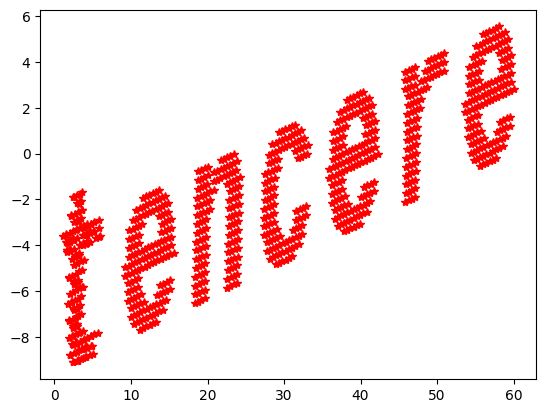

In [36]:
# Your code starts here
# project all data point in Nd_Data to the plane spanned by u1,u2 first and then plot in 2D
# let the coordinates of Nd_Data on this plane be X1, Y1

# Perform SVD on the Nd_Data
U, S, Vt = np.linalg.svd(Nd_Data, full_matrices=False)

# Denoising: Retain only the top k singular values for reconstruction
k = 3  # Adjust based on noise level and desired approximation
S_truncated = np.zeros_like(S)
S_truncated[:k] = S[:k]  # Retain the top k singular values
Sigma_truncated = np.diag(S_truncated)
ND_Data_denoised = U @ Sigma_truncated @ Vt

# Projection onto the plane spanned by u1, u2 (most significant plane for the data)
Plane_basis = U[:, :2]  # Select u1 and u2
Projected_Data = Plane_basis.T @ ND_Data_denoised  # Use the denoised data for projection

# Extract X1, Y1 coordinates for plotting
X1, Y1 = Projected_Data[0, :], Projected_Data[1, :]


# Your code ends here

# let's plot and see
plt.plot(X1, Y1, 'r*')

### Explain - 4:
The failure to achieve the task arises from the challenge of correctly pairing $ X $-coordinates from $ T1 $ (used for $ XY $ plane) with $ Z $-coordinates from $ T2 $ (used for $ XZ $ plane) while maintaining the orthogonality of the two planes and ensuring a proper cubic structure. The main issue lies in the mismatch between the dimensions and alignment of $ X, Y, Z $ across $ T1 $ and $ T2 $. This alignment problem occurs because the coordinate systems of $ T1 $ and $ T2 $ are derived independently on orthogonal planes, but no reliable correspondence is established between their $ X $-coordinates, making the resulting $ 3D $ structure inconsistent.

Mathematically, the goal was to create a $ 3D $ matrix $ \mathbf{M} $ where:
$$
\mathbf{M} = \begin{bmatrix} X \\ Y \\ Z \end{bmatrix},
$$
with $ X, Y $ coming from $ T1 $ and $ Z $ coming from $ T2 $, but ensuring $ X $ remains consistent for both $ T1 $ and $ T2 $. However, the process of finding the closest matches between $ T1_X $ and $ T2_X $ ($ \arg\min |T1_X - T2_X| $) introduces inconsistencies because the distribution of $ T2_X $ might not align perfectly with $ T1_X $, leading to truncation and mismatched dimensions.

Without a direct mapping or shared basis, the pairing between $ T1 $ and $ T2 $ fails to form a coherent $ 3D $ cubic structure, resulting in incomplete or incorrect data projections when denoised and visualized.

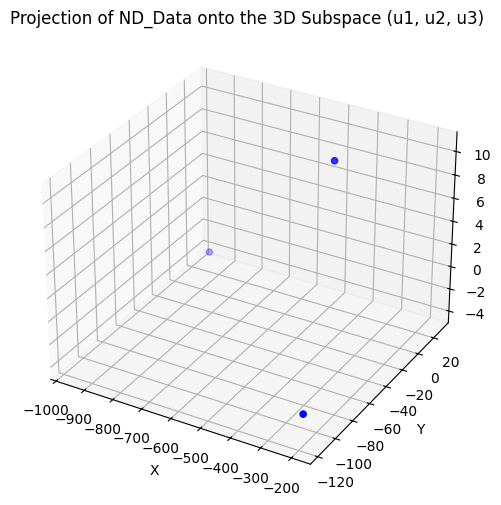

In [47]:
# Your code starts here

# Perform SVD on the Nd_Data
U, S, Vt = np.linalg.svd(Nd_Data, full_matrices=False)

# Denoising: Retain only the top k singular values for reconstruction
k = 3  # Number of dimensions to retain
S_truncated = np.zeros_like(S)
S_truncated[:k] = S[:k]  # Retain top k singular values
Sigma_truncated = np.diag(S_truncated)

# Reconstruct the denoised rank-3 approximation
ND_Data_denoised = U[:, :k] @ Sigma_truncated @ Vt[:k, :]

# Compute the coordinates in the 3D subspace spanned by u1, u2, u3
C = U[:, :k] @ Sigma_truncated  # Coordinates in the rank-3 approximation

# Extract X1, Y1, Z1 for 3D visualization
X1, Y1, Z1 = C[:, 0], C[:, 1], C[:, 2]

# Your code ends here

# Visualize in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, Y1, Z1, c='b', marker='o')
ax.set_title("Projection of ND_Data onto the 3D Subspace (u1, u2, u3)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()